In [1]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [2]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
dataset.shape

(200, 5)

In [5]:
# Feature Selection
X = dataset.iloc[:, [3, 4]].values

# unsupervised learning there is no y value/label
# """y = dataset.iloc[:, 3].values"""

In [7]:
X[:3]

array([[15, 39],
       [15, 81],
       [16,  6]])

In [8]:
# Splitting the dataset into the Training set and Test set
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

# Feature Scaling
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

# Selecting optimal k value

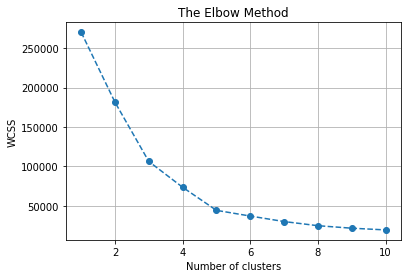

In [12]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, '--o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [14]:
# best k is 5

# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [16]:
y_kmeans[:5]

array([2, 3, 2, 3, 2], dtype=int32)

In [18]:
dataset['y'] = y_kmeans

In [19]:
dataset.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [20]:
dataset.tail(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y
195,196,Female,35,120,79,4
196,197,Female,45,126,28,1
197,198,Male,32,126,74,4
198,199,Male,32,137,18,1
199,200,Male,30,137,83,4


In [27]:
# indexes for cluster 0
X[y_kmeans == 2,1]

array([39,  6, 40,  6,  3, 14, 15, 13, 35, 29, 35,  5, 14, 32, 31,  4,  4,
       14, 17, 26, 35, 36, 28])

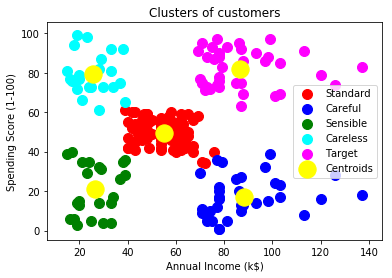

In [37]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Careful')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Sensible')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Target')

# visualize centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

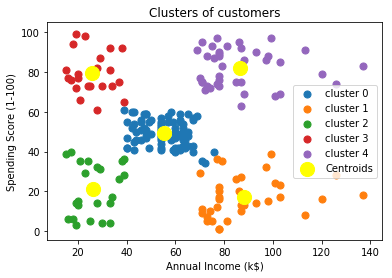

In [54]:
# Fitting K-Means to the dataset
k = 5
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s = 50, label = 'cluster {}'.format(i))

# visualize centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [55]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [64]:
# cluster i
i = 4
cluster_i = X[y_kmeans == i]
centroid_i = kmeans.cluster_centers_[i]

cluster_i[:4], centroid_i

(array([[69, 91],
        [70, 77],
        [71, 95],
        [71, 75]]), array([86.53846154, 82.12820513]))

In [65]:
cluster_i.shape, centroid_i.shape

((39, 2), (2,))

In [66]:
dif_i = cluster_i - centroid_i

In [68]:
dif_i[:3]

array([[-17.53846154,   8.87179487],
       [-16.53846154,  -5.12820513],
       [-15.53846154,  12.87179487]])

In [70]:
dif_square = np.power(dif_i,2)

In [71]:
dif_square[:3]

array([[307.59763314,  78.70874425],
       [273.52071006,  26.29848784],
       [241.44378698, 165.68310322]])

In [76]:
distances_i = np.sqrt(np.sum(dif_square, axis = 1))

In [77]:
distances_i[:3]

array([19.65467826, 17.31528798, 20.17738561])

In [78]:
distances_i

array([19.65467826, 17.31528798, 20.17738561, 17.09547002, 17.09547002,
       18.30857213, 14.75696161, 16.32832109, 16.1181127 , 15.85345446,
       11.61006274, 17.6678389 , 12.53195783, 11.61337505, 10.3625914 ,
       10.51000588, 10.96024134,  9.48406047, 12.49917815,  7.58870402,
       12.20124911,  7.29233654, 12.88305259, 19.13377248,  7.14313139,
        9.88257819,  4.13846472, 13.20930977, 10.18413638, 11.15502499,
       12.8780759 , 19.40258291, 20.21737557, 16.71016021, 21.05545104,
       27.90916986, 33.60744298, 40.28995826, 50.46906865])

In [80]:
len(distances_i)

39

In [91]:
n_a = 10
np.argsort(distances_i)[-n_a:]

array([23, 31,  0,  2, 32, 34, 35, 36, 37, 38])

In [102]:
def detectAnomalyWithKmeans(clusterId = 0, n_a = 1):
    """ It detects anomalies for given cluster ID
        number of expected anomalies are n_a
    """
    i = clusterId
    # Data points in cluster i
    cluster_i = X[y_kmeans == i]
    # Centroid of the cluster i
    centroid_i = kmeans.cluster_centers_[i]
    
    # Differences
    dif_i = cluster_i - centroid_i
    # Squared Differences
    dif_square = np.power(dif_i,2)
    # Distance
    distances_i = np.sqrt(np.sum(dif_square, axis = 1))
    
    # return expected number of anomalies in a given cluster
    return X[np.argsort(distances_i)[-n_a:]]

In [103]:
anomaly_index = detectAnomalyWithKmeans(clusterId = 4, n_a = 2)

In [104]:
anomaly_index

array([[34, 73],
       [37, 26]])

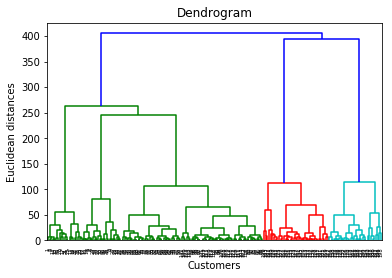

In [105]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

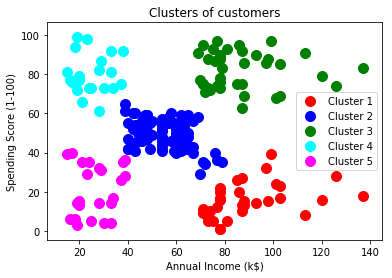

In [107]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()